# Task1: Predict Restaurant Ratings
**Objective: Build a machine learning model to predict the aggregate rating of a restaurant based on other features.**

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
data = pd.read_csv("/content/Dataset .csv")

In [4]:
data.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [5]:
data.tail()

Restaurant ID           Restaurant Name  Country Code       City  \
9546        5915730               Naml۱ Gurme           208  ��stanbul   
9547        5908749              Ceviz A��ac۱           208  ��stanbul   
9548        5915807                     Huqqa           208  ��stanbul   
9549        5916112               A���k Kahve           208  ��stanbul   
9550        5927402  Walter's Coffee Roastery           208  ��stanbul   

                                                Address     Locality  \
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...     Karak�_y   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...    Ko��uyolu   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...  Kuru�_e��me   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...  Kuru�_e��me   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...         Moda   

            Locality Verbose  Longitude   Latitude  \
9546     Karak�_y, ��stanbul  28.977392  41.022793   
9547    Ko��uyolu, ��stanbul  29.041297  41.009847   
9548  Kuru�_e��me, ��stanbul  29.034640  41.055817   
9549  Kuru�_e��me, ��stanbul  29.036019  41.057979   
9550         Moda, ��stanbul  29.026016  40.984776   

                             Cuisines  ...          Currency  \
9546                          Turkish  ...  Turkish Lira(TL)   
9547  World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548           Italian, World Cuisine  ...  Turkish Lira(TL)   
9549                  Restaurant Cafe  ...  Turkish Lira(TL)   
9550                             Cafe  ...  Turkish Lira(TL)   

     Has Table booking Has Online delivery Is delivering now  \
9546                No                  No                No   
9547                No                  No                No   
9548                No                  No                No   
9549                No                  No                No   
9550                No                  No                No   

     Switch to order menu Price range  Aggregate rating  Rating color  \
9546                   No           3               4.1         Green   
9547                   No           3               4.2         Green   
9548                   No           4               3.7        Yellow   
9549                   No           4               4.0         Green   
9550                   No           2               4.0         Green   

     Rating text Votes  
9546   Very Good   788  
9547   Very Good  1034  
9548        Good   661  
9549   Very Good   901  
9550   Very Good   591  

[5 rows x 21 columns]

In [6]:
# Print the actual column names to identify any discrepancies
print(data.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
# Select features and target
features = [
    'Country Code', 'City', 'Cuisines', 'Average Cost for two',
    'Has Table booking', 'Has Online delivery', 'Price range', 'Votes'
]
target = 'Aggregate rating'

# Handle missing values
data['Cuisines'].fillna('Unknown', inplace=True)

# Split the dataset into features (X) and target (y)
X = data[features]
y = data[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numerical_features = ['Average Cost for two', 'Price range', 'Votes']
categorical_features = ['Country Code', 'City', 'Cuisines', 'Has Table booking', 'Has Online delivery']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Define the model
model = DecisionTreeRegressor(random_state=42)

# Create and compile the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.17
R-squared: 0.93


In [9]:
# Analyze feature importances
model_steps = pipeline.named_steps['model']
if hasattr(model_steps, 'feature_importances_'):
    feature_names = (
        numerical_features +
        list(pipeline.named_steps['preprocessor']
             .transformers_[1][1]
             .get_feature_names_out(categorical_features))
    )
    importances = model_steps.feature_importances_
    feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
    print("\nFeature Importances:")
    print(feature_importances)
else:
    print("\nThe model does not provide feature importances.")



Feature Importances:
                                                Feature    Importance
2                                                 Votes  9.490835e-01
3                                        Country Code_1  7.135062e-03
0                                  Average Cost for two  6.986873e-03
5                                       Country Code_30  1.401799e-03
98                                       City_New Delhi  1.182278e-03
...                                                 ...           ...
399   Cuisines_Burger, Coffee and Tea, Modern Austra...  0.000000e+00
1024  Cuisines_Italian, Chinese, Mexican, Thai, Nort...  0.000000e+00
845   Cuisines_European, North Indian, Mediterranean...  0.000000e+00
1200  Cuisines_Mithai, North Indian, South Indian, S... -3.028121e-19
1425             Cuisines_North Indian, Mughlai, Awadhi -5.046868e-19

[1690 rows x 2 columns]


# Task2: Restaurant Recommendation
**Objective: Create a restaurant recommendation system based on user preferences.**

In [14]:
#Task2
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
data = pd.read_csv("/content/Dataset .csv")

# Preprocessing: Handle missing values
data['Cuisines'].fillna('Unknown', inplace=True)

# Define features for recommendation
features = ['Cuisines', 'Price range']

def preprocess_features(df):
    """Combine selected features into a single string for vectorization."""
    df['Combined Features'] = df['Cuisines'] + ' ' + df['Price range'].astype(str)
    return df

data = preprocess_features(data)

# Vectorize the combined features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
feature_matrix = vectorizer.fit_transform(data['Combined Features'])

# Function to recommend restaurants based on user preferences
def recommend_restaurants(user_preferences, data, feature_matrix, top_n=5):
    """Generate restaurant recommendations based on user preferences."""
    user_query = ' '.join([str(value) for value in user_preferences.values()])
    user_vector = vectorizer.transform([user_query])
    similarity_scores = cosine_similarity(user_vector, feature_matrix).flatten()

    # Get top N recommendations
    recommendations = similarity_scores.argsort()[-top_n:][::-1]
    return data.iloc[recommendations]

# Example user preferences
user_preferences = {
    'Cuisines': 'Italian',
    'Price range': 2
}

# Generate recommendations
recommended_restaurants = recommend_restaurants(user_preferences, data, feature_matrix)

# Display the recommendations
print("Recommended Restaurants:")
print(recommended_restaurants[['Restaurant Name', 'Cuisines', 'Price range', 'Aggregate rating']])


Recommended Restaurants:
              Restaurant Name Cuisines  Price range  Aggregate rating
1479   56 Ristorante Italiano  Italian            4               3.7
3397            Da Pizza Farm  Italian            1               0.0
357   Maggiano's Little Italy  Italian            4               4.4
2555             Little Italy  Italian            3               3.0
7841                Pasta Hub  Italian            1               3.0


# Task4: Location-based Analysis
**Objective: Perform a geographical analysis of the restaurants in the dataset.**

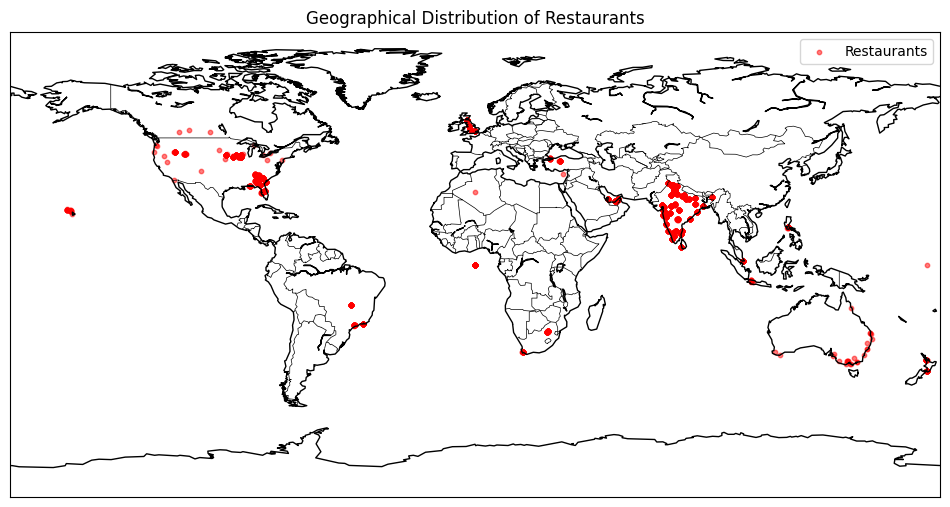

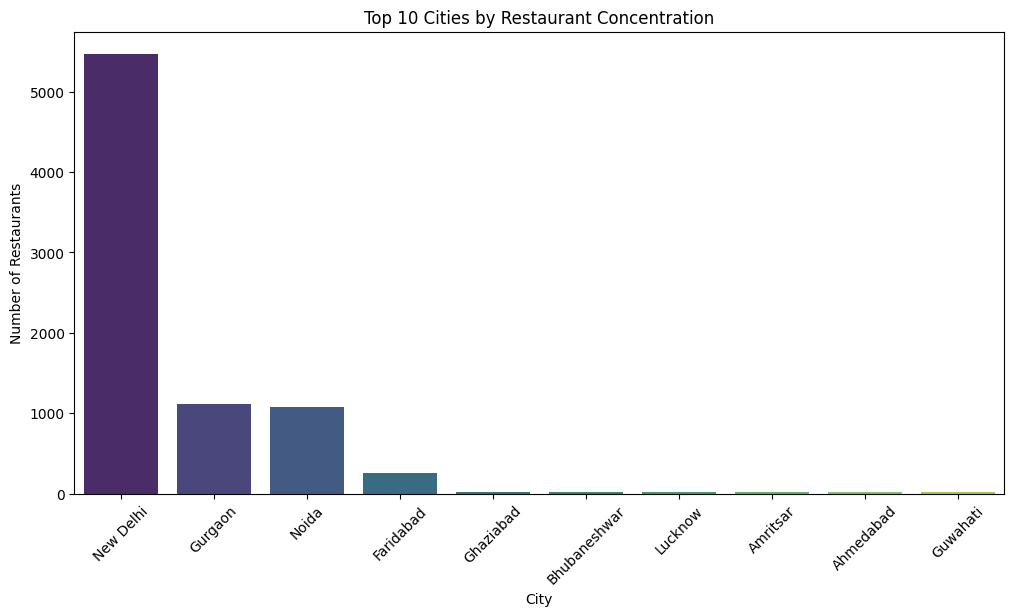

Top 10 Cities by Average Rating:
                 City  Average Rating  Average Price Range  Unique Cuisines
56         Inner City        4.900000                 4.00                2
107       Quezon City        4.800000                 3.00                1
73        Makati City        4.650000                 3.00                2
95         Pasig City        4.633333                 3.00                3
75   Mandaluyong City        4.625000                 3.75                4
15         Beechworth        4.600000                 2.00                1
67             London        4.535000                 3.00               15
123       Taguig City        4.525000                 3.50                4
122     Tagaytay City        4.500000                 3.00                1
116      Secunderabad        4.500000                 2.00                2

Interesting Insights:
City with the highest average rating: Inner City (Rating: 4.90)

Number of restaurants by price range:
Price

In [18]:
#Task4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install basemap
from mpl_toolkits.basemap import Basemap

# Load the dataset
data = pd.read_csv('/content/Dataset .csv')

# Handle missing values for location-related columns
if 'Latitude' in data.columns and 'Longitude' in data.columns:
    data = data.dropna(subset=['Latitude', 'Longitude'])

# 1. Visualize the distribution of restaurants on a map
plt.figure(figsize=(12, 8))
world_map = Basemap()
world_map.drawcoastlines()
world_map.drawcountries()

# Scatter plot of restaurant locations
lons = data['Longitude']
lats = data['Latitude']
world_map.scatter(lons, lats, latlon=True, c='red', alpha=0.5, s=10, label='Restaurants')

plt.title('Geographical Distribution of Restaurants')
plt.legend()
plt.show()

# 2. Group restaurants by city and analyze concentration
if 'City' in data.columns:
    city_group = data.groupby('City').size().reset_index(name='Restaurant Count')
    city_group = city_group.sort_values(by='Restaurant Count', ascending=False)

    # Plot the top 10 cities by restaurant concentration
    top_cities = city_group.head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='City', y='Restaurant Count', data=top_cities, palette='viridis')
    plt.xticks(rotation=45)
    plt.title('Top 10 Cities by Restaurant Concentration')
    plt.ylabel('Number of Restaurants')
    plt.xlabel('City')
    plt.show()

# 3. Calculate statistics by city
if 'City' in data.columns:
    city_stats = data.groupby('City').agg({
        'Aggregate rating': 'mean',
        'Price range': 'mean',
        'Cuisines': 'nunique'
    }).reset_index()
    city_stats.rename(columns={
        'Aggregate rating': 'Average Rating',
        'Price range': 'Average Price Range',
        'Cuisines': 'Unique Cuisines'
    }, inplace=True)

    # Display top 10 cities with highest average rating
    top_rated_cities = city_stats.sort_values(by='Average Rating', ascending=False).head(10)
    print("Top 10 Cities by Average Rating:")
    print(top_rated_cities)

# 4. Identify interesting insights or patterns
print("\nInteresting Insights:")
if 'City' in data.columns and 'Aggregate rating' in data.columns:
    top_rated_city = city_stats.loc[city_stats['Average Rating'].idxmax()]
    print(f"City with the highest average rating: {top_rated_city['City']} (Rating: {top_rated_city['Average Rating']:.2f})")

if 'Price range' in data.columns:
    price_range_pattern = data.groupby('Price range').size()
    print("\nNumber of restaurants by price range:")
    print(price_range_pattern)

# Save results to CSV
city_stats.to_csv('/content/city_stats.csv', index=False)